In [61]:
#Importing neccessary modules

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,precision_score
%matplotlib inline

## Data Preprocessing and Exploration

In [62]:
data = pd.read_csv("DATA_COLLECTION_SHEET.csv")

In [63]:
data.head()

,NAME of Responder,NUMBER OF MEMBERS IN HOUSEHOLD,AVG HOUSEHOLD INCOME,HOUSE ADDRESS,AGE OF MEMBERS,MALE MEMBERS,FEMALE MEMBERS,NO. OF CHILDREN,STUDYING CHILDREN,NON STUDYING CHILDREN,FOOD CONSUMPTION PATTERNS,EXPENDITURES,HOUSEHOLD ASSETS,SOURCES OF WATER,AVAILABILITY OF SMART DEVICES,ACCESS TO INTERNET,ANY PREDOMINANT AILMENT
0,Sanjay Goswami,4,105000,"Barrackpore, West Bengal, India",44.5,2,2,0,0,0,NonVeg,65000,"TV, FRIDGE, AC, WM, 2W",DeepTW,"Computer, Laptop, SmartPhone",Yes,Type-1 Diabetes
1,Debmalya Halder,3,75000,"Shibpur, Howrah, West Bengal, India",35.5,2,1,1,1,1,NonVeg,45000,"TV, AC, FRIDGE, WM, 4W",DeepTW,"Computer, Smartphone",Yes,NaN
2,Majid Mallik,3,40000,Dum Dum,40,2,1,0,0,0,NonVeg,35000,"TV, FRIDGE, WM",Tap,"Laptop, Smartphone",Yes,Type-2 Diabetes
3,Malabika Ghosh,10,100000,"Bagnan, Howrah, West Bengal.",38.5,5,5,3,3,0,Non-veg,60000,"TV, FRIDGE, WM, 2W, Geyser, kitchen chimney",Tap,"Computer, Laptop, Smartphone",Yes,Diabetes
4,Arpita Chaudhury,4,100000,"Sakherbazar Behala , West Bengal",34.5,2,2,2,2,0,Non veg,50000,TV AC WM FRIDGE 4W,Tap,Laptop smartphone,Yes,NaN


In [64]:
data.describe()
#Avg family members = 4
# Avg male members = 2
# Avg female members = 2
# Avg no of children = 1


,NUMBER OF MEMBERS IN HOUSEHOLD,MALE MEMBERS,FEMALE MEMBERS,NO. OF CHILDREN,STUDYING CHILDREN,NON STUDYING CHILDREN
count,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,3.907514,1.988439,1.913295,1.063584,1.028902,0.144509
std,1.729565,1.028594,1.033450,0.995048,0.924019,0.368745
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,4.000000,2.000000,2.000000,1.000000,1.000000,0.000000
75%,5.000000,2.000000,2.000000,2.000000,2.000000,0.000000
max,10.000000,6.000000,5.000000,5.000000,5.000000,2.000000


In [65]:
data.info()
#Total No of entries in the dataset 173
#Some of the columns have missing value
#predominant ailment has the maximum missing values

#Age of members,Expenditure,Avg household income is of wrong datatype


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   NAME of Responder               173 non-null    object
 1   NUMBER OF MEMBERS IN HOUSEHOLD  173 non-null    int64 
 2   AVG HOUSEHOLD INCOME            173 non-null    object
 3   HOUSE ADDRESS                   173 non-null    object
 4   AGE OF MEMBERS                  173 non-null    object
 5   MALE MEMBERS                    173 non-null    int64 
 6   FEMALE MEMBERS                  173 non-null    int64 
 7   NO. OF CHILDREN                 173 non-null    int64 
 8   STUDYING CHILDREN               173 non-null    int64 
 9   NON STUDYING CHILDREN           173 non-null    int64 
 10  FOOD CONSUMPTION PATTERNS       171 non-null    object
 11  EXPENDITURES                    172 non-null    object
 12  HOUSEHOLD ASSETS                173 non-null    ob

In [66]:
data.isna().sum()
#predominant ailment has 28 null values

NAME of Responder                  0
NUMBER OF MEMBERS IN HOUSEHOLD     0
AVG HOUSEHOLD INCOME               0
HOUSE ADDRESS                      0
AGE OF MEMBERS                     0
MALE MEMBERS                       0
FEMALE MEMBERS                     0
NO. OF CHILDREN                    0
STUDYING CHILDREN                  0
NON STUDYING CHILDREN              0
FOOD CONSUMPTION PATTERNS          2
EXPENDITURES                       1
HOUSEHOLD ASSETS                   0
SOURCES OF WATER                   1
AVAILABILITY OF SMART DEVICES      0
ACCESS TO INTERNET                 0
ANY PREDOMINANT AILMENT           28
dtype: int64

In [67]:
def get_mean(x):
    #split into list of strings
    splited = x.split(',')
    #Transform into numbers
    y = [float(n) for n in splited]
    return sum(y)/len(y)
    

In [68]:
data['AGE OF MEMBERS'] = data['AGE OF MEMBERS'].apply(get_mean)

In [69]:
data.info()
#No the datatype of AGE OF MEMBERS is float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   NAME of Responder               173 non-null    object 
 1   NUMBER OF MEMBERS IN HOUSEHOLD  173 non-null    int64  
 2   AVG HOUSEHOLD INCOME            173 non-null    object 
 3   HOUSE ADDRESS                   173 non-null    object 
 4   AGE OF MEMBERS                  173 non-null    float64
 5   MALE MEMBERS                    173 non-null    int64  
 6   FEMALE MEMBERS                  173 non-null    int64  
 7   NO. OF CHILDREN                 173 non-null    int64  
 8   STUDYING CHILDREN               173 non-null    int64  
 9   NON STUDYING CHILDREN           173 non-null    int64  
 10  FOOD CONSUMPTION PATTERNS       171 non-null    object 
 11  EXPENDITURES                    172 non-null    object 
 12  HOUSEHOLD ASSETS                173 

In [70]:
data['AGE OF MEMBERS']
# Converted all the comma separated values by doing their sum and obtained there mean values

0      44.500000
1      35.500000
2      40.000000
3      38.500000
4      34.500000
         ...    
168    44.500000
169    27.000000
170    32.500000
171    41.571429
172    32.000000
Name: AGE OF MEMBERS, Length: 173, dtype: float64

In [71]:
Food_pattern = data.groupby('FOOD CONSUMPTION PATTERNS')

In [72]:
Food_pattern.describe()
#Here different keywords for Non veg is being taken as different values
#Same apply to the veg
#Using Regex we need to convert them into one two common values

NUMBER OF MEMBERS IN HOUSEHOLD                      \
                                                   count      mean       std   
FOOD CONSUMPTION PATTERNS                                                      
NON VEG                                             13.0  4.846154  1.625123   
Non Veg                                             27.0  4.185185  2.000712   
Non Vegetarian                                       8.0  4.000000  1.690309   
Non veg                                             80.0  3.712500  1.780298   
Non- Veg                                            10.0  3.600000  1.173788   
Non-Veg                                              5.0  3.200000  1.483240   
Non-veg                                              3.0  5.666667  3.785939   
NonVeg                                               3.0  3.333333  0.577350   
Nonveg                                               2.0  5.000000  2.828427   
VEG                                                  2.0  5.000000  1.414214   
Veg                                                 16.0  3.562500  0.813941   
Vegetarian                                           2.0  3.500000  0.707107   

                                                      AGE OF MEMBERS  \
                           min   25%  50%   75%   max          count   
FOOD CONSUMPTION PATTERNS                                              
NON VEG                    3.0  3.00  5.0  6.00   7.0           13.0   
Non Veg                    1.0  3.00  4.0  5.50  10.0           27.0   
Non Vegetarian             2.0  2.75  4.0  5.00   7.0            8.0   
Non veg                    1.0  3.00  3.0  4.00  10.0           80.0   
Non- Veg                   2.0  3.00  3.5  4.75   5.0           10.0   
Non-Veg                    1.0  3.00  3.0  4.00   5.0            5.0   
Non-veg                    3.0  3.50  4.0  7.00  10.0            3.0   
NonVeg                     3.0  3.00  3.0  3.50   4.0            3.0   
Nonveg                     3.0  4.00  5.0  6.00   7.0            2.0   
VEG                        4.0  4.50  5.0  5.50   6.0            2.0   
Veg                        2.0  3.00  4.0  4.00   5.0           16.0   
Vegetarian                 3.0  3.25  3.5  3.75   4.0            2.0   

                                      ... STUDYING CHILDREN       \
                                mean  ...               75%  max   
FOOD CONSUMPTION PATTERNS             ...                          
NON VEG                    39.769231  ...              2.00  3.0   
Non Veg                    46.635802  ...              2.00  5.0   
Non Vegetarian             42.786012  ...              1.25  2.0   
Non veg                    39.543750  ...              2.00  4.0   
Non- Veg                   46.300000  ...              1.00  2.0   
Non-Veg                    33.150000  ...              1.00  1.0   
Non-veg                    45.500000  ...              2.00  3.0   
NonVeg                     40.000000  ...              0.50  1.0   
Nonveg                     47.500000  ...              1.50  2.0   
VEG                        39.500000  ...              1.75  2.0   
Veg                        40.036458  ...              1.25  3.0   
Vegetarian                 39.250000  ...              1.00  1.0   

                          NON STUDYING CHILDREN                           \
                                          count      mean       std  min   
FOOD CONSUMPTION PATTERNS                                                  
NON VEG                                    13.0  0.307692  0.480384  0.0   
Non Veg                                    27.0  0.333333  0.554700  0.0   
Non Vegetarian                              8.0  0.125000  0.353553  0.0   
Non veg                                    80.0  0.100000  0.301893  0.0   
Non- Veg                                   10.0  0.100000  0.316228  0.0   
Non-Veg                                     5.0  0.000000  0.000000  0.0   
Non-veg                                

In [73]:
data['FOOD CONSUMPTION PATTERNS']= data['FOOD CONSUMPTION PATTERNS'].replace([r'N[oO]...\w+',r'^V[eE]\w+'],['Non_Veg','Veg'],regex=True)

In [74]:
data.groupby('FOOD CONSUMPTION PATTERNS').describe()
#Total 171 values where replaced with proper words and two where null values

NUMBER OF MEMBERS IN HOUSEHOLD                      \
                                                   count      mean       std   
FOOD CONSUMPTION PATTERNS                                                      
Non_Veg                                            151.0  3.933775  1.820875   
Veg                                                 20.0  3.700000  0.923381   

                                                    AGE OF MEMBERS             \
                           min  25%  50%  75%   max          count       mean   
FOOD CONSUMPTION PATTERNS                                                       
Non_Veg                    1.0  3.0  4.0  5.0  10.0          151.0  41.471555   
Veg                        2.0  3.0  4.0  4.0   6.0           20.0  39.904167   

                           ... STUDYING CHILDREN      NON STUDYING CHILDREN  \
                           ...               75%  max                 count   
FOOD CONSUMPTION PATTERNS  ...                                                
Non_Veg                    ...              1.50  5.0                 151.0   
Veg                        ...              1.25  3.0                  20.0   

                                                                       
                              mean       std  min  25%  50%  75%  max  
FOOD CONSUMPTION PATTERNS                                              
Non_Veg                    0.15894  0.384581  0.0  0.0  0.0  0.0  2.0  
Veg                        0.05000  0.223607  0.0  0.0  0.0  0.0  1.0  

[2 rows x 56 columns]

<AxesSubplot:xlabel='FOOD CONSUMPTION PATTERNS', ylabel='count'>

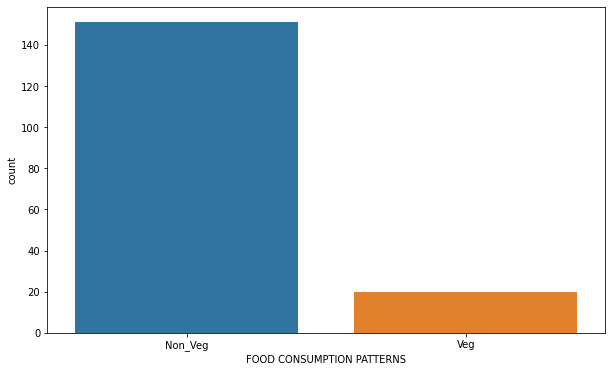

In [75]:
plt.figure(figsize=(10,6))
sns.countplot(x=data['FOOD CONSUMPTION PATTERNS'])
#Majority of people are Non-Vegetarian

<AxesSubplot:xlabel='AGE OF MEMBERS', ylabel='Count'>

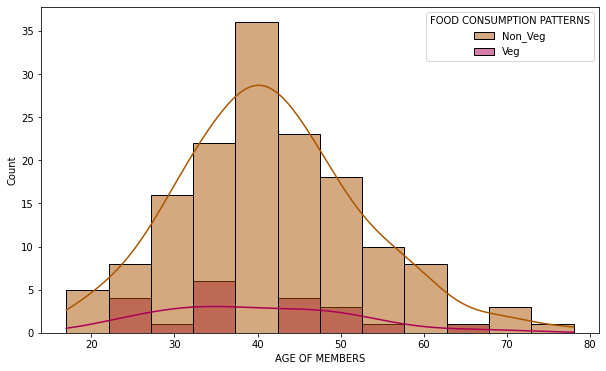

In [76]:
plt.figure(figsize=(10,6))
sns.histplot(x=data['AGE OF MEMBERS'],kde=True,hue=data['FOOD CONSUMPTION PATTERNS'],palette="brg_r")
#Majority of the population is in the range of 35 to 45
#Majority of the are Non-Vegetarian

## New DataFrame for Analysis on Income and Expenditure Pattern

In [77]:
income_exp = pd.DataFrame({'Income':data['AVG HOUSEHOLD INCOME'],'Expenditure':data['EXPENDITURES']})

In [78]:
income_exp.dropna(inplace=True)

In [79]:
income_exp.isna().sum()

Income         0
Expenditure    0
dtype: int64

In [80]:
income_exp.info()
#Need to convert string into int type

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172 entries, 0 to 172
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Income       172 non-null    object
 1   Expenditure  172 non-null    object
dtypes: object(2)
memory usage: 4.0+ KB


In [81]:
income_exp['Expenditure'] = income_exp['Expenditure'].replace([r'[-]','k'],[',',''],regex=True)
#Replace all the - symbol with , to apply get mean function
#Replace all the k with blank to convert the values into int datatype

In [82]:
#Removing the Non-veg keyword from the Expenditure column
income_exp['Expenditure'] = income_exp['Expenditure'].replace(r'N[oO]...\w+',0,regex=True)

In [83]:
# converting all the values into string
income_exp['Expenditure'] = income_exp['Expenditure'].astype(str)

In [84]:
income_exp['Expenditure'] = income_exp['Expenditure'].apply(get_mean)

In [85]:
income_exp['Expenditure'].dtype

dtype('float64')

In [86]:
income_exp['Income'] = income_exp['Income'].astype(int)

In [87]:
correlatn = income_exp['Income'].corr(income_exp['Expenditure'])

<AxesSubplot:title={'center':'Income vs Expenditure Correlation:0.83'}, xlabel='Expenditure', ylabel='Income'>

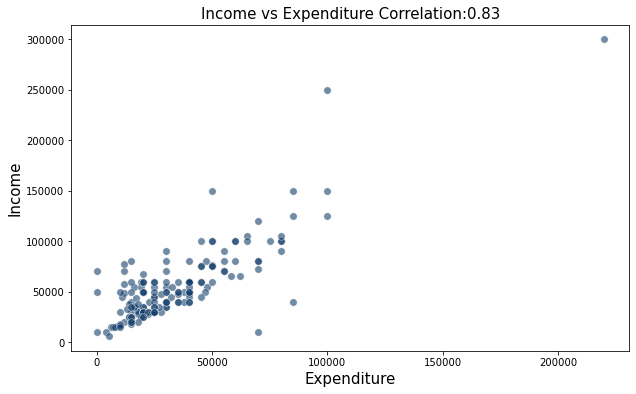

In [88]:
plt.figure(figsize=(10,6))
plt.title(f'Income vs Expenditure Correlation:{round(correlatn,2)}',fontsize=15)
plt.xlabel('Expenditure',fontsize=15)
plt.ylabel('Income',fontsize=15)
sns.scatterplot(x=income_exp['Expenditure'],y=income_exp['Income'],color='#143F6B',s=55,alpha=0.6)


In [89]:
#There is no relation between Income and No of Family members
income_exp['Income'].corr(data['NUMBER OF MEMBERS IN HOUSEHOLD'])

0.11645463042716757

In [90]:
data[['ANY PREDOMINANT AILMENT','NUMBER OF MEMBERS IN HOUSEHOLD']].isna().sum()

ANY PREDOMINANT AILMENT           28
NUMBER OF MEMBERS IN HOUSEHOLD     0
dtype: int64

In [91]:
Ailment = pd.DataFrame({'Ailment':data['ANY PREDOMINANT AILMENT'].dropna()})

In [92]:
Ailment.reset_index()

,index,Ailment
0,0,Type-1 Diabetes
1,2,Type-2 Diabetes
2,3,Diabetes
3,5,Diabetes
4,7,No
...,...,...
140,162,No
141,163,Sugar
142,164,Diabetes
143,165,No


In [93]:
#No of people suffering from diabetes
Diabetes = Ailment[Ailment['Ailment'].str.match('[dD]\w+|Sugar')].count()

In [94]:
Diabetes[0]

43

In [95]:
data['ANY PREDOMINANT AILMENT'].value_counts().head(5)

None          52
Diabetes      31
No            21
Joint pain     3
Arthritis      3
Name: ANY PREDOMINANT AILMENT, dtype: int64

In [96]:
#Majority of People are suffering from Diabetes 29% people.
Diabetes[0]/Ailment.count()

Ailment    0.296552
dtype: float64

In [97]:
data[['HOUSEHOLD ASSETS','AVAILABILITY OF SMART DEVICES','SOURCES OF WATER']]

,HOUSEHOLD ASSETS,AVAILABILITY OF SMART DEVICES,SOURCES OF WATER
0,"TV, FRIDGE, AC, WM, 2W","Computer, Laptop, SmartPhone",DeepTW
1,"TV, AC, FRIDGE, WM, 4W","Computer, Smartphone",DeepTW
2,"TV, FRIDGE, WM","Laptop, Smartphone",Tap
3,"TV, FRIDGE, WM, 2W, Geyser, kitchen chimney","Computer, Laptop, Smartphone",Tap
4,TV AC WM FRIDGE 4W,Laptop smartphone,Tap
...,...,...,...
168,"Tv ,Refrigerator, Washing machine","Smartphone, Laptop",Tap water
169,"Tv Refrigerator Washing machine,Air conditioner","Tv, Alexa , Smartphone, Laptop",Package Drinking water
170,"TV, Refrigerator","Smartphone,PC",Tap water
171,Tv,Smartphone,"Deep water,Tap water"


In [98]:
data['SOURCES OF WATER']= data['SOURCES OF WATER'].str.replace(r'Corp$','Corporation water',regex=True)


<AxesSubplot:title={'center':'Top 5 sources of water'}>

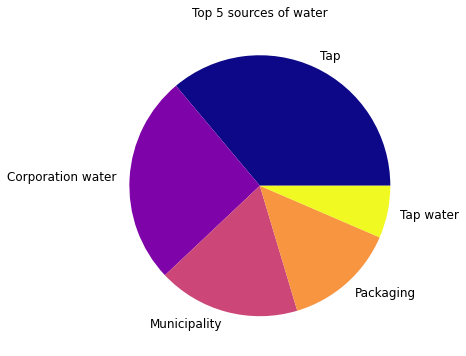

In [99]:
data['SOURCES OF WATER'].value_counts().head(5).plot(kind='pie',figsize=(6,6),ylabel='',
                                                     title='Top 5 sources of water',fontsize=12,colormap='plasma')

<AxesSubplot:ylabel='AVAILABILITY OF SMART DEVICES'>

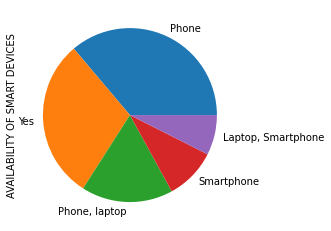

In [100]:
data['AVAILABILITY OF SMART DEVICES'].value_counts().head(5).plot(kind='pie')

<AxesSubplot:xlabel='ACCESS TO INTERNET', ylabel='count'>

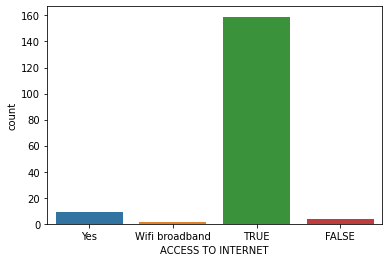

In [101]:
sns.countplot(x=data['ACCESS TO INTERNET'])


In [102]:
data['AVG HOUSEHOLD INCOME'] = income_exp['Income']
data['EXPENDITURES'] = income_exp['Expenditure']

In [103]:
#data.to_csv('Clean_NICA_data.csv')

## Income Prediction using Linear Regression

In [104]:
model = LinearRegression()
X = pd.DataFrame(income_exp,columns =['Expenditure'])
y= pd.DataFrame(income_exp,columns=['Income'])

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=5)

In [106]:
model.fit(X_train,y_train)

LinearRegression()

In [107]:
model.score(X_test,y_test)

0.6086598807424626

In [108]:
#Due to the high skewness present in the data Some of the folds giving poor accuracy
cross_val_score(model,X,y,cv=5)

array([0.14975684, 0.14438623, 0.65894918, 0.807421  , 0.77143918])

In [109]:
income_exp.skew()

Income         2.966358
Expenditure    2.817364
dtype: float64

Text(0.5, 1.0, 'Expenditure Data dtribution, skew:2.82')

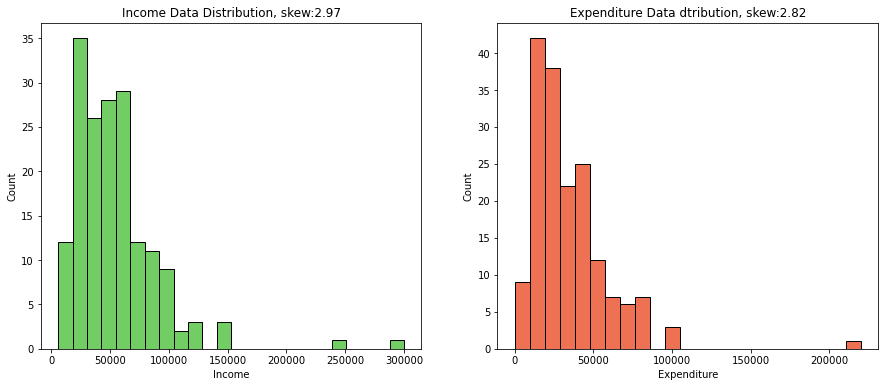

In [110]:
fig, ax = plt.subplots(1,2,figsize=(15,6))
sns.histplot(income_exp['Income'],ax=ax[0],color='#44bd32')
ax[0].set_title(f'Income Data Distribution, skew:{round(income_exp.skew()[0],2)}')


sns.histplot(income_exp['Expenditure'],ax=ax[1],color='#e84118')
ax[1].set_title(f'Expenditure Data dtribution, skew:{round(income_exp.skew()[1],2)}')

#### The Data is very much skewed to the right, to normalise:
* Need to Remove the Outliers
* Use Log values for Income

In [111]:
X = pd.DataFrame(income_exp['Expenditure'].loc[income_exp['Expenditure']<100000])[0:164]
X['Expenditure'].sort_values(ascending=False)[:10]

26     85000.0
23     85000.0
131    85000.0
97     80000.0
100    80000.0
21     80000.0
158    75000.0
95     70000.0
142    70000.0
18     70000.0
Name: Expenditure, dtype: float64

In [112]:
y_log = pd.DataFrame(np.log(income_exp['Income'].loc[income_exp['Income']<120000]))
y['Income'].sort_values(ascending=False)[:10]
y = income_exp['Income'].loc[income_exp['Income']<120000]

<AxesSubplot:title={'center':'-0.710740085277489'}, xlabel='Income', ylabel='Count'>

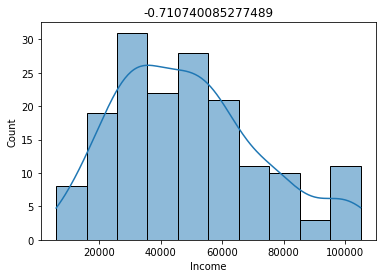

In [137]:
plt.title(f'{y_log.skew()[0]}')
sns.histplot(y,kde=True)


In [114]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [115]:
log_model = LinearRegression()

In [116]:
log_model.fit(X_train,y_train)

LinearRegression()

In [117]:
log_model.score(X_test,y_test)

0.008693939318201616

In [118]:
cross_val_score(log_model,X,y)

array([ 0.18180138, -0.01051983,  0.16671177,  0.17686994, -0.32569842])

# Different Machine Learning Algo Performances

In [128]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [120]:
Tree_model = DecisionTreeRegressor()

In [127]:
cross_val_score(Tree_model,X,y)

array([-0.21002587, -0.64543418, -0.95100295, -0.73768704, -0.53508989])

In [129]:
forest_model = RandomForestRegressor()

In [131]:
cross_val_score(forest_model,X,y)

array([ 0.00664996, -0.34424228, -0.45626214, -0.33088361, -0.53502274])